# Market Basket Analysis
In this code I developed a market basket analysis to find relationship between items in customers' baskets. The result consists of rules showing association between some items. It means if a customer buys some certain items it is likely that he/she buys some other certains items too.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [2]:
import warnings
warnings.filterwarnings ("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import itertools

In [3]:
#Importing data
data=pd.read_excel(r'/content/drive/My Drive/OnlineRetail.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#General Data Inspection
print("The number of items= ",data.Description.unique().shape[0])
print("The number of customers= ", data['InvoiceNo'].unique().shape[0])
print("The number of purchases of all items:", data['Description'].value_counts().sum())
print("")
TGREEN =  '\033[43m' 
print(TGREEN + "The number of purchase for each item: ")
r= '\033[0m'   # reset
print(r+"")
print( data['Description'].value_counts())
print(TGREEN + "items with more than 1500 purchases:")
print(r+"")
print(data['Description'].value_counts()>1500)
red = '\033[31m' # Red Text
print("")
print(TGREEN + "The proportional purchase for each item (%): ")
print(r+"")
print(data['Description'].value_counts()/data['Description'].value_counts().sum()*100)

The number of items=  4224
The number of customers=  25900
The number of purchases of all items: 540455

The number of purchase for each item: 

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
BLUE GINGHAM ROSE CUSHION COVER           1
Damages/samples                           1
FLOWER SHOP DESIGN MUG                    1
Dotcom set                                1
allocate stock for dotcom orders ta       1
Name: Description, Length: 4223, dtype: int64
items with more than 1500 purchases:

WHITE HANGING HEART T-LIGHT HOLDER      True
REGENCY CAKESTAND 3 TIER                True
JUMBO BAG RED RETROSPOT                 True
PARTY BUNTING                           True
LUNCH BAG RED RETROSPOT                 True
                                       ...  
BLUE GINGHAM ROSE

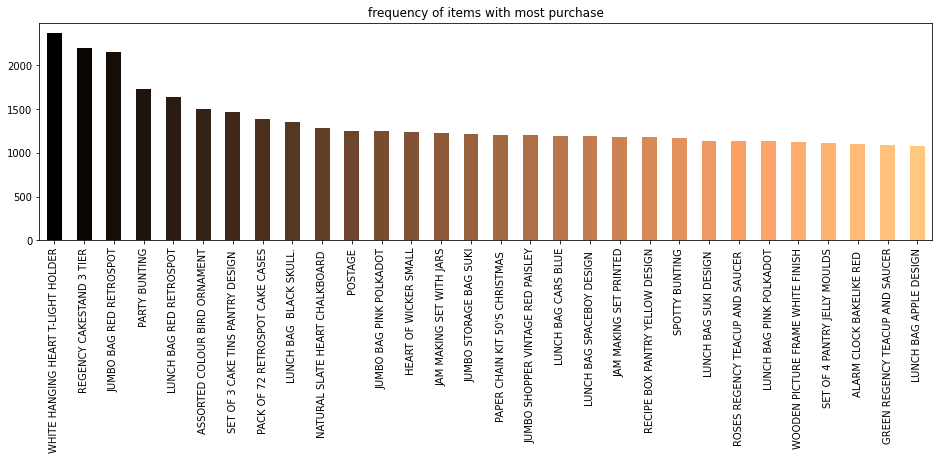

In [18]:
#Bar plot for most probable items
fig, ax = plt.subplots(1,1,figsize=(16,4))
color = plt.cm.copper(np.linspace(0, 1, 30))
data['Description'].value_counts().head(30).plot.bar(color=color)
plt.title('frequency of items with most purchase')
plt.xticks(rotation = 90 )
# plt.grid()
plt.show()

In [5]:
#Finding items with the most purchase (more than 0.3% all purchases)
group1=data['Description'].value_counts().index[data['Description'].value_counts()/data['Description'].value_counts().sum()>0.003]
#Finding groups of 2 items with the most purchase
group2=list(permutations(group1,2))
print("The number of items with the  purchase more than 0.3% all purchases: ", group1.shape[0])
print("The number of 2-item groups of items with high purchase: ", len(group2))
print("")
#groups of 2 items with the most purchase
Yellow =  '\033[43m' 
print(Yellow+"groups of 2 items with the most purchase")
r= '\033[0m'   # reset
print(r+"")
for item in group2:
  print(item)

The number of items with the  purchase more than 0.3% all purchases:  5
The number of 2-item groups of items with high purchase:  20
groups of 2 items with the most purchase

('WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER')
('WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT')
('WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING')
('WHITE HANGING HEART T-LIGHT HOLDER', 'LUNCH BAG RED RETROSPOT')
('REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER')
('REGENCY CAKESTAND 3 TIER', 'JUMBO BAG RED RETROSPOT')
('REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING')
('REGENCY CAKESTAND 3 TIER', 'LUNCH BAG RED RETROSPOT')
('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER')
('JUMBO BAG RED RETROSPOT', 'REGENCY CAKESTAND 3 TIER')
('JUMBO BAG RED RETROSPOT', 'PARTY BUNTING')
('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT')
('PARTY BUNTING', 'WHITE HANGING HEART T-LIGHT HOLDER')
('PARTY BUNTING', 'REGENCY CAKESTAND 3 TIER')
('PARTY BUNTING', 'JU

In [6]:
#an example
Yellow =  '\033[43m' 
print(Yellow+"An example")
r= '\033[0m'   # reset
print(r+"")

print("The number of purchases for item'PARTY BUNTING': ",
      data[data['Description']=='PARTY BUNTING']['Description'].value_counts().mean())
print("The number of purchases of both items 'PARTY BUNTING' & 'REGENCY CAKESTAND 3 TIER' by one custumer at the same time: ",
      len([value for value in data[data['Description']=='PARTY BUNTING']['InvoiceNo'].tolist() if value in data[data['Description']=='REGENCY CAKESTAND 3 TIER']['InvoiceNo'].tolist()]))
print("The number of purchases for item'PARTY BUNTING'/both items 'PARTY BUNTING' & 'REGENCY CAKESTAND 3 TIER': ",
      len([value for value in data[data['Description']=='PARTY BUNTING']['InvoiceNo'].tolist() if value in data[data['Description']=='REGENCY CAKESTAND 3 TIER']['InvoiceNo'].tolist()])/data[data['Description']=='PARTY BUNTING']['Description'].value_counts().mean())

An example

The number of purchases for item'PARTY BUNTING'  1727.0
The number of purchases of both items 'PARTY BUNTING' & 'REGENCY CAKESTAND 3 TIER' by one custumer at the same time 402
0.23277359583092067


In [7]:
#Finding 2-item groups that purchase of both items at the same time / purchase of the first item is more than 20%
group2_i=[]
group2_i_percen=[]
for item in group2:
  pr10=data[data['Description']==item[0]]['Description'].value_counts().mean()
  pr2=[value for value in data[data['Description']==item[0]]['InvoiceNo'].tolist() if value in data[data['Description']==item[1]]['InvoiceNo'].tolist()]
  # print("T(A&B)= ",len(pr2)/data.shape[0])
  # print("Confidence/A= ",len(pr2)/pr10)
  if (len(pr2)/pr10)>0.2:
    group2_i.append(item)
    group2_i_percen.append(len(pr2)/pr10)

Yellow =  '\033[43m' 
print(Yellow+"2-item groups that purchase of both items at the same time / purchase of the first item is more than 20%")
r= '\033[0m'   # reset
print(r+"") for item in group2_i:
  print(item)

2-item groups that purchase of both items at the same time / purchase of the first item is more than 20%

[('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), ('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), ('PARTY BUNTING', 'WHITE HANGING HEART T-LIGHT HOLDER'), ('PARTY BUNTING', 'REGENCY CAKESTAND 3 TIER'), ('LUNCH BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), ('LUNCH BAG RED RETROSPOT', 'JUMBO BAG RED RETROSPOT'), ('LUNCH BAG RED RETROSPOT', 'PARTY BUNTING')]


In [8]:
Yellow =  '\033[43m' 
print(Yellow+"groups of 3 items with the most purchase")
r= '\033[0m'   # reset
print(r+"")

import itertools
for i in itertools.product(group2_i, group1):
  print(i)

groups of 3 items with the most purchase

(('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'WHITE HANGING HEART T-LIGHT HOLDER')
(('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'REGENCY CAKESTAND 3 TIER')
(('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'JUMBO BAG RED RETROSPOT')
(('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'PARTY BUNTING')
(('JUMBO BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'LUNCH BAG RED RETROSPOT')
(('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), 'WHITE HANGING HEART T-LIGHT HOLDER')
(('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), 'REGENCY CAKESTAND 3 TIER')
(('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), 'JUMBO BAG RED RETROSPOT')
(('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), 'PARTY BUNTING')
(('JUMBO BAG RED RETROSPOT', 'LUNCH BAG RED RETROSPOT'), 'LUNCH BAG RED RETROSPOT')
(('PARTY BUNTING', 'WHITE HANGING HEART T-LIGHT HOLDER'), '

In [9]:
#Finding 3-item groups that purchase of all three items at the same time / purchase of the two first items is more than 35%, so you can conclude
#when a customer buys 2 first items, it is probable (>35%) he/she buys the third one
group3_i=[]
group3_i_percen=[]
for i in itertools.product(group2_i, group1):
  pr2=[value for value in data[data['Description']==i[0][0]]['InvoiceNo'].tolist() if value in data[data['Description']==i[0][1]]['InvoiceNo'].tolist()]
  if (i[1]!=i[0][0]) & (i[1]!=i[0][1]):
    pr3=[value for value in pr2 if value in data[data['Description']==i[1]]['InvoiceNo'].tolist()]
    if (len(pr3)/len(pr2))>0.35:
      group3_i.append(i)
      group3_i_percen.append(len(pr3)/len(pr2))


print(Yellow+"3-item groups that #when a customer buys 2 first items, it is probable (>35%) he/she buys the third one")
print(r+"")
for item in group3_i:
  print(item)


3-item groups that #when a customer buys 2 first items, it is probable (>35%) he/she buys the third one

[(('LUNCH BAG RED RETROSPOT', 'WHITE HANGING HEART T-LIGHT HOLDER'), 'JUMBO BAG RED RETROSPOT'), (('LUNCH BAG RED RETROSPOT', 'PARTY BUNTING'), 'REGENCY CAKESTAND 3 TIER'), (('LUNCH BAG RED RETROSPOT', 'PARTY BUNTING'), 'JUMBO BAG RED RETROSPOT')]


In [21]:
Rules2=[]
for i, item in enumerate(group2_i):
  x="if a customer buys <<{}>> then it is possible with a probability of {}% to buy <<{}>>".format(item[0],int(group2_i_percen[i]*100),item[1])
  Rules2.append(x)

Rules3=[]
for i, item in enumerate(group3_i):
  x="if a customer buys <<{}>> and <<{}>>, then it is possible with a probability of {}% to buy <<{}>>".format(item[0][0],item[0][1],int(group3_i_percen[i]*100),item[1])
  Rules3.append(x)

Yellow =  '\033[43m' 
print(Yellow+"Rules (between 2 items)")
print(r+"")
for item in Rules2:
  print(item)

print(Yellow+"Rules (between 3 items)")
print(r+"")
for item in Rules3:
  print(item)

Rules (between 2 items)

if a customer buys <<JUMBO BAG RED RETROSPOT>> then it is possible with a probability of 21% to buy <<WHITE HANGING HEART T-LIGHT HOLDER>>
if a customer buys <<JUMBO BAG RED RETROSPOT>> then it is possible with a probability of 27% to buy <<LUNCH BAG RED RETROSPOT>>
if a customer buys <<PARTY BUNTING>> then it is possible with a probability of 22% to buy <<WHITE HANGING HEART T-LIGHT HOLDER>>
if a customer buys <<PARTY BUNTING>> then it is possible with a probability of 23% to buy <<REGENCY CAKESTAND 3 TIER>>
if a customer buys <<LUNCH BAG RED RETROSPOT>> then it is possible with a probability of 20% to buy <<WHITE HANGING HEART T-LIGHT HOLDER>>
if a customer buys <<LUNCH BAG RED RETROSPOT>> then it is possible with a probability of 36% to buy <<JUMBO BAG RED RETROSPOT>>
if a customer buys <<LUNCH BAG RED RETROSPOT>> then it is possible with a probability of 20% to buy <<PARTY BUNTING>>
Rules (between 3 items)

if a customer buys <<LUNCH BAG RED RETROSPOT>> and